# Maximizing SINR Beamforming

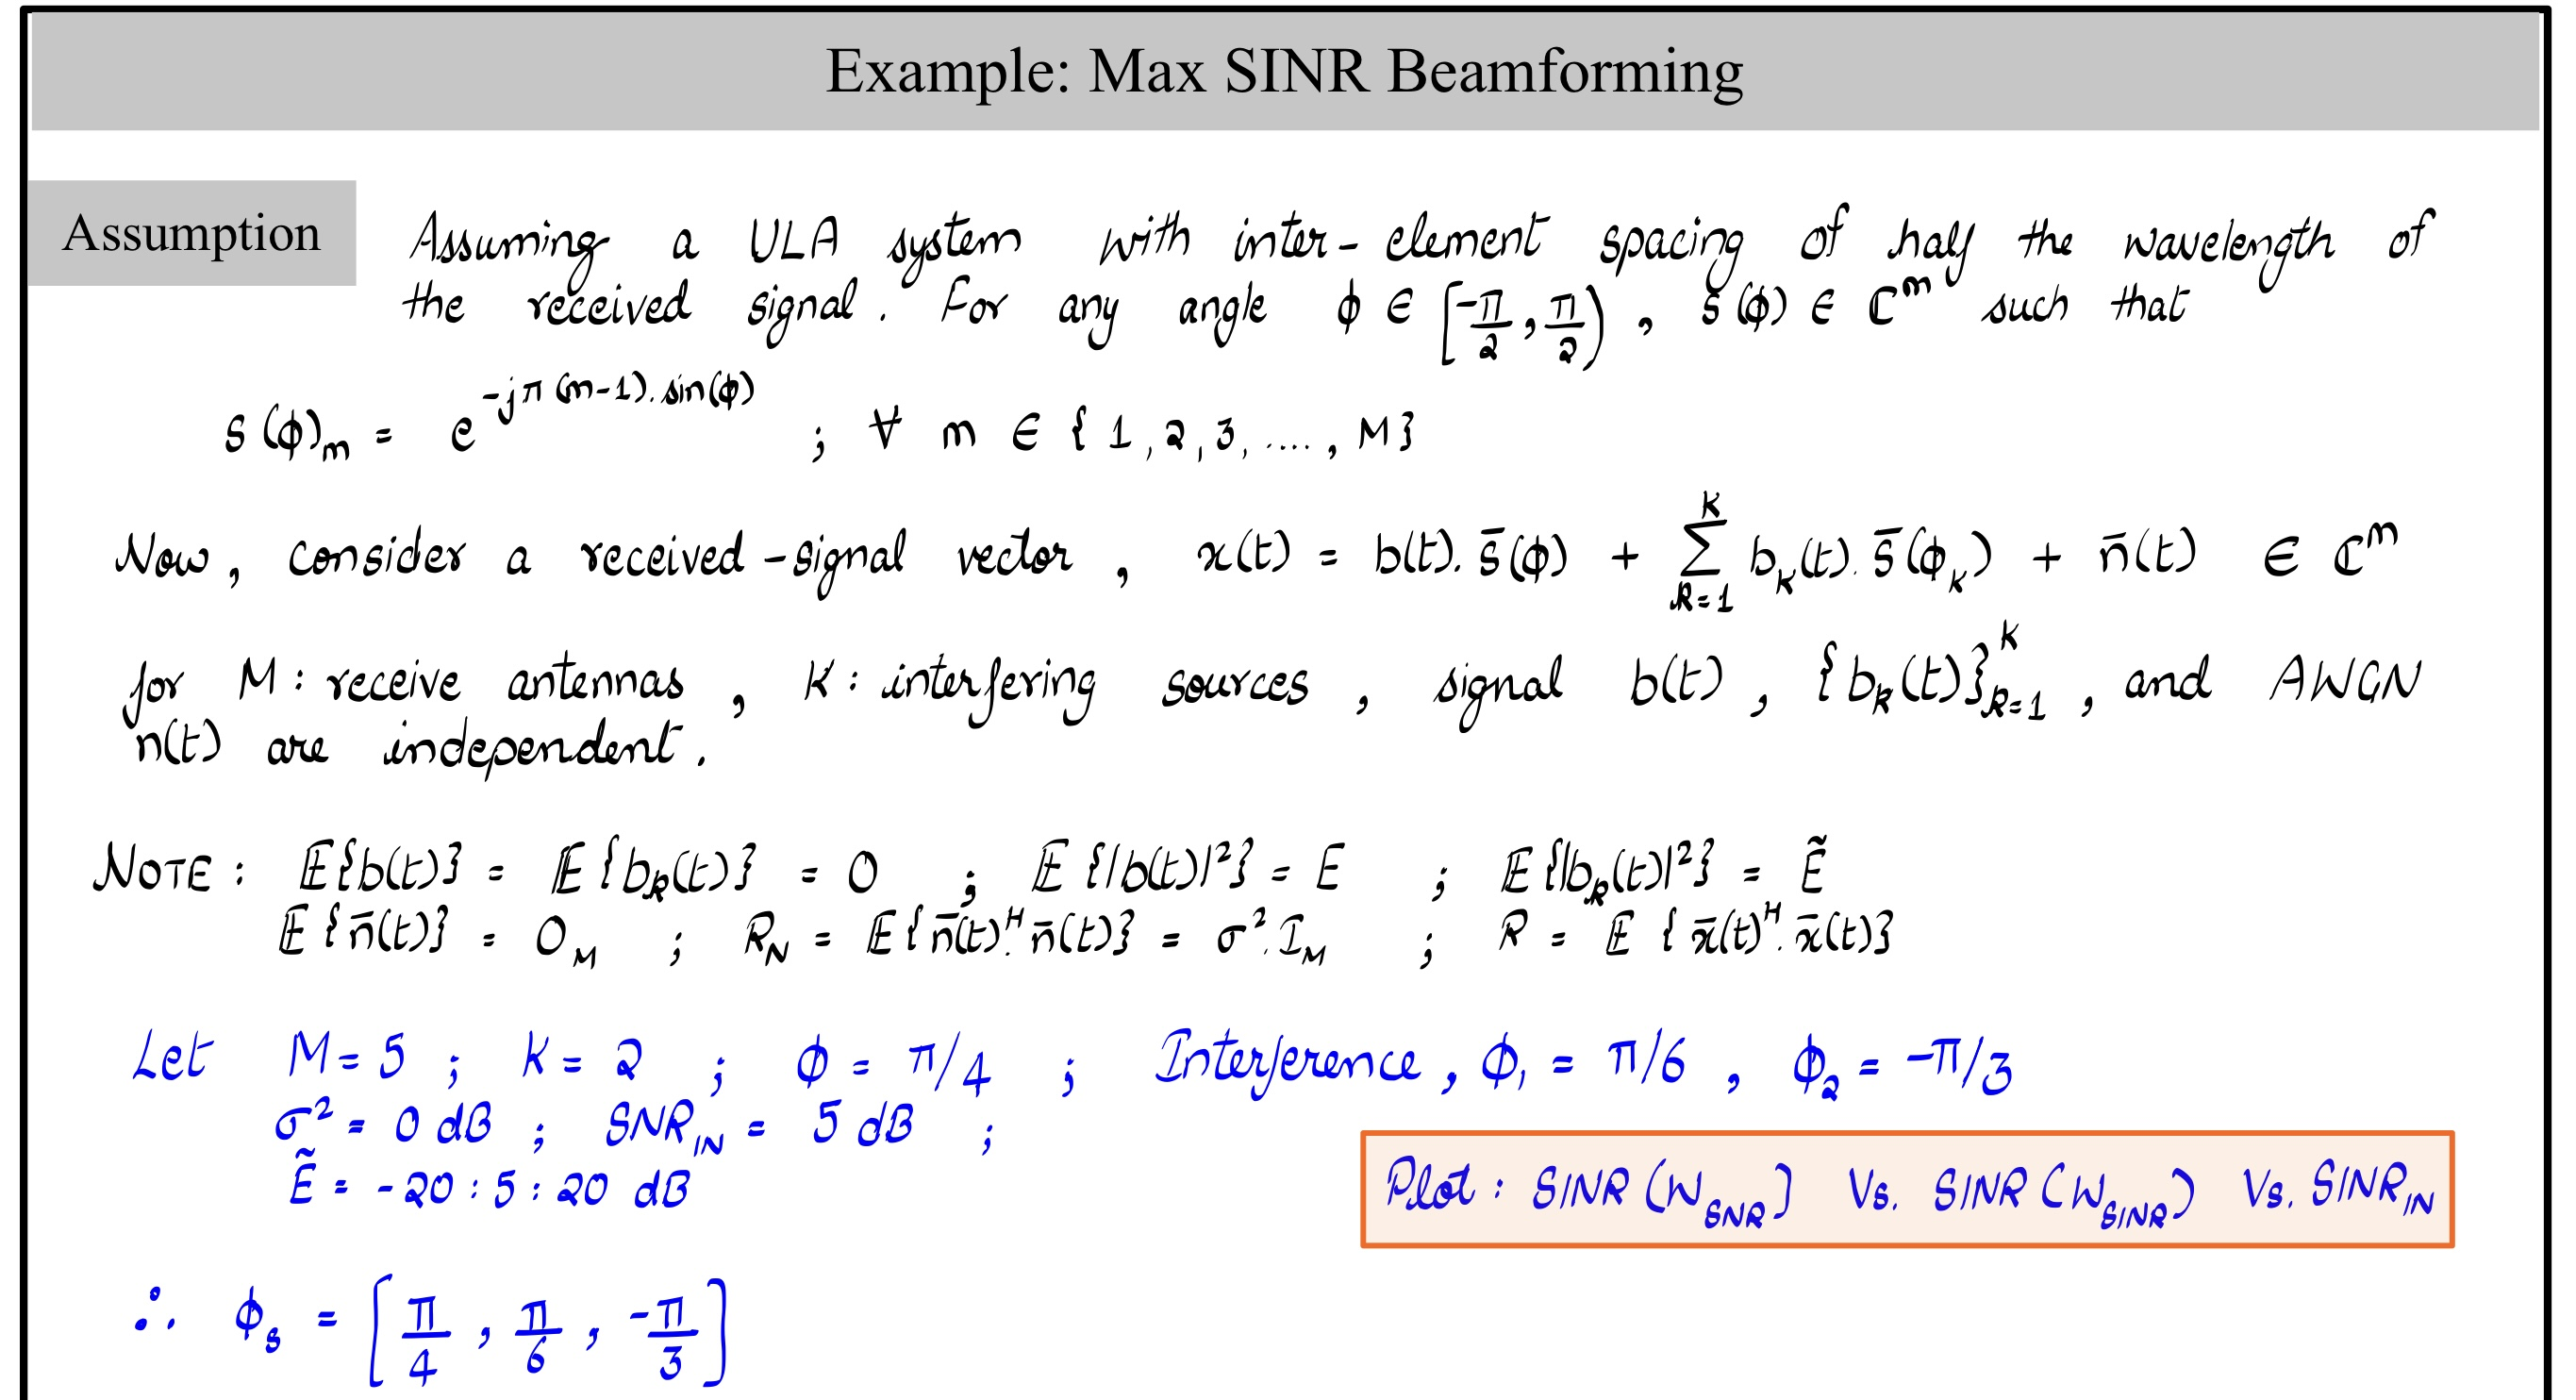
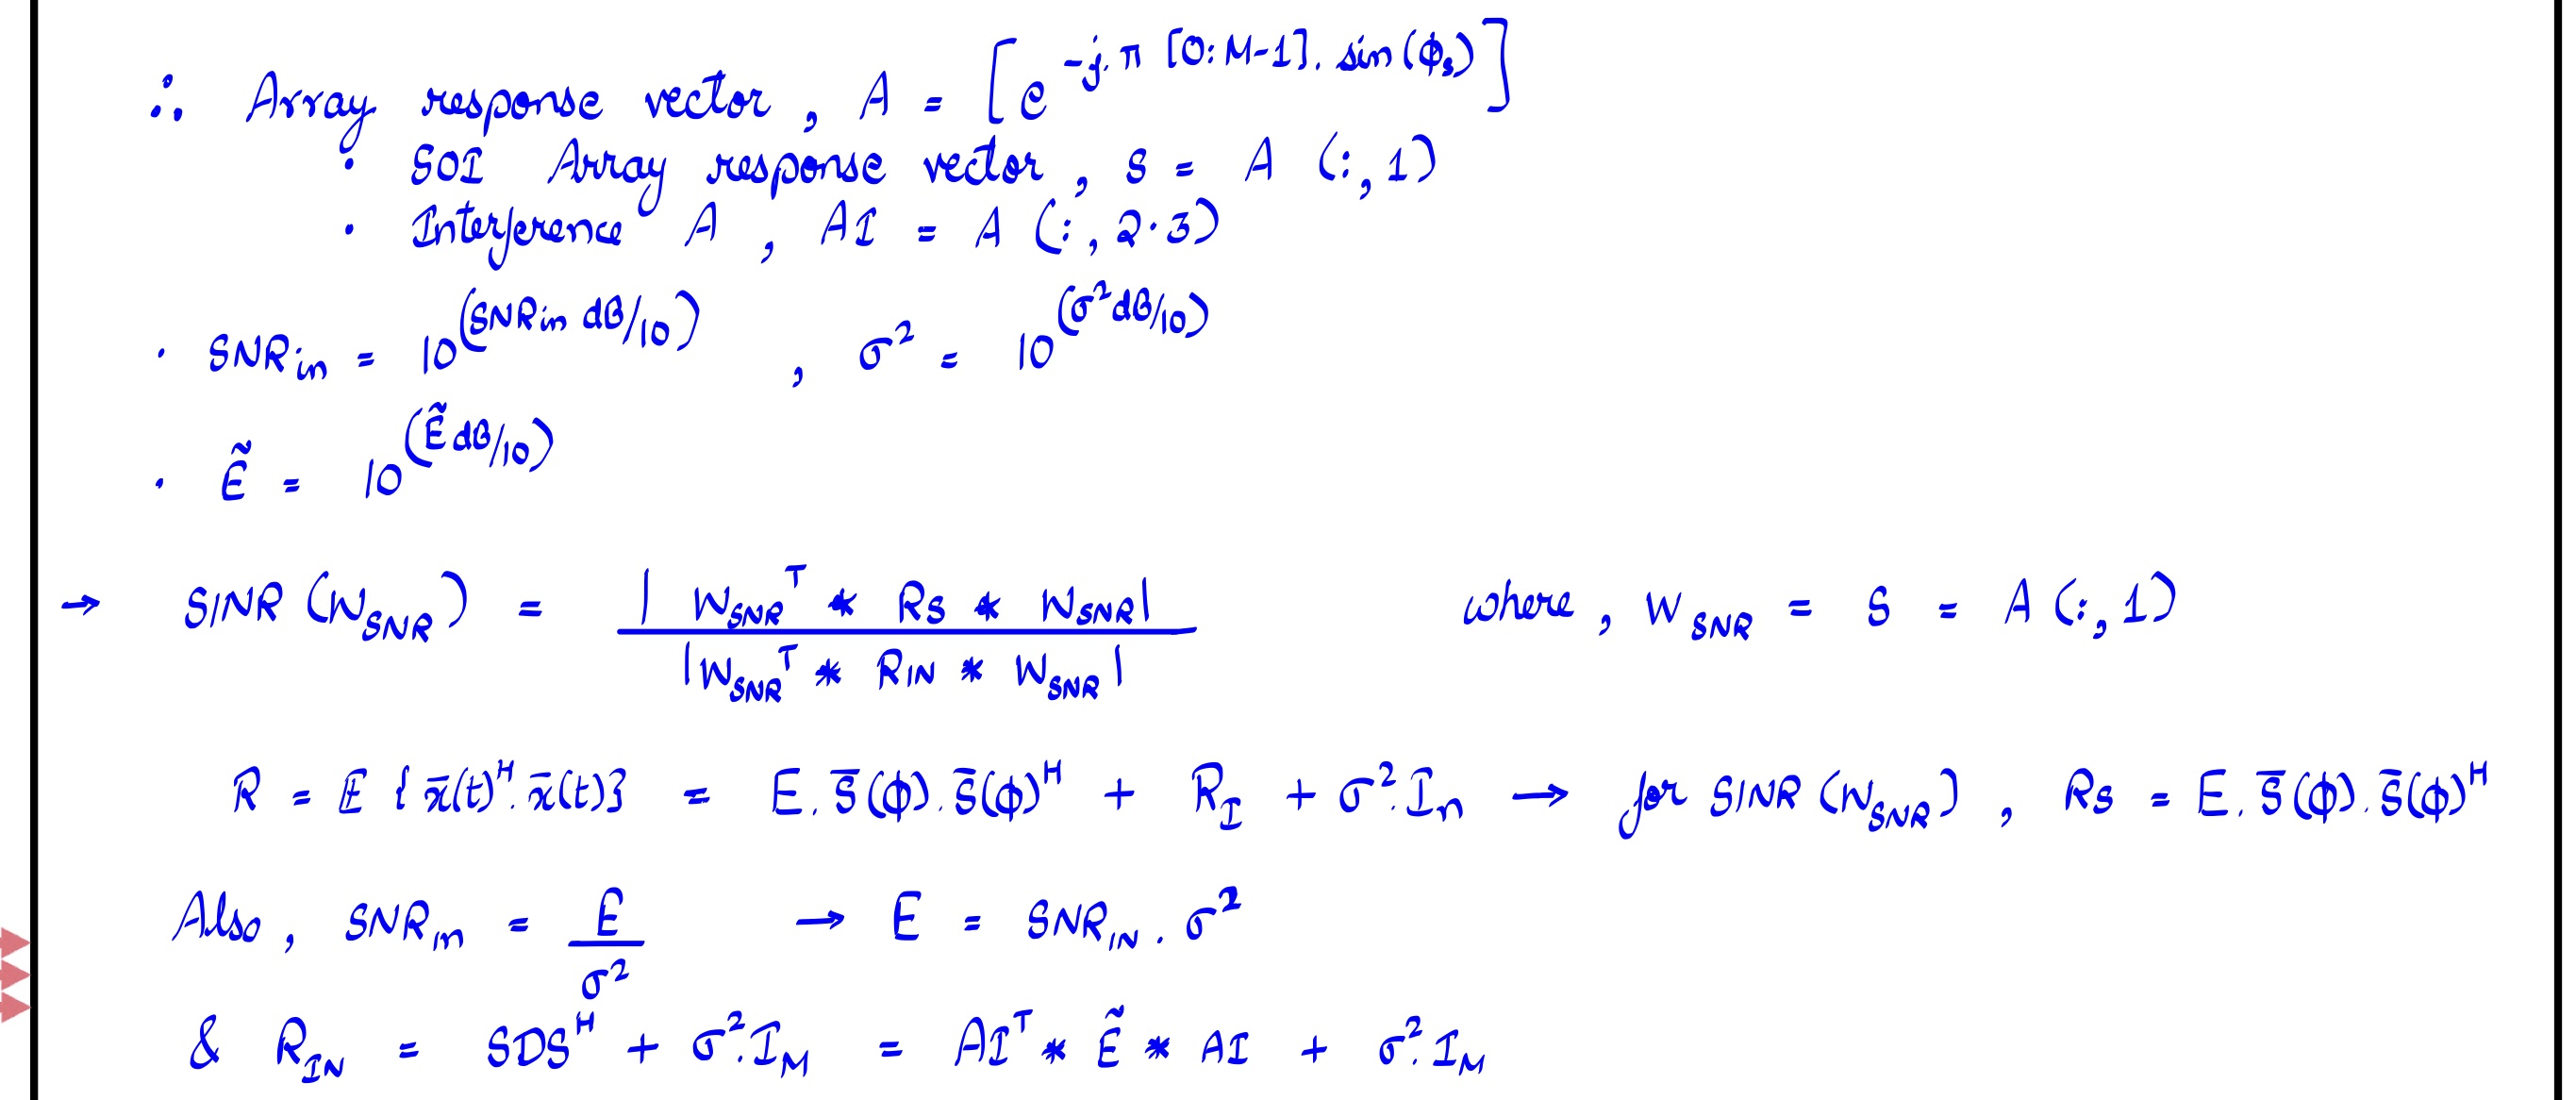 
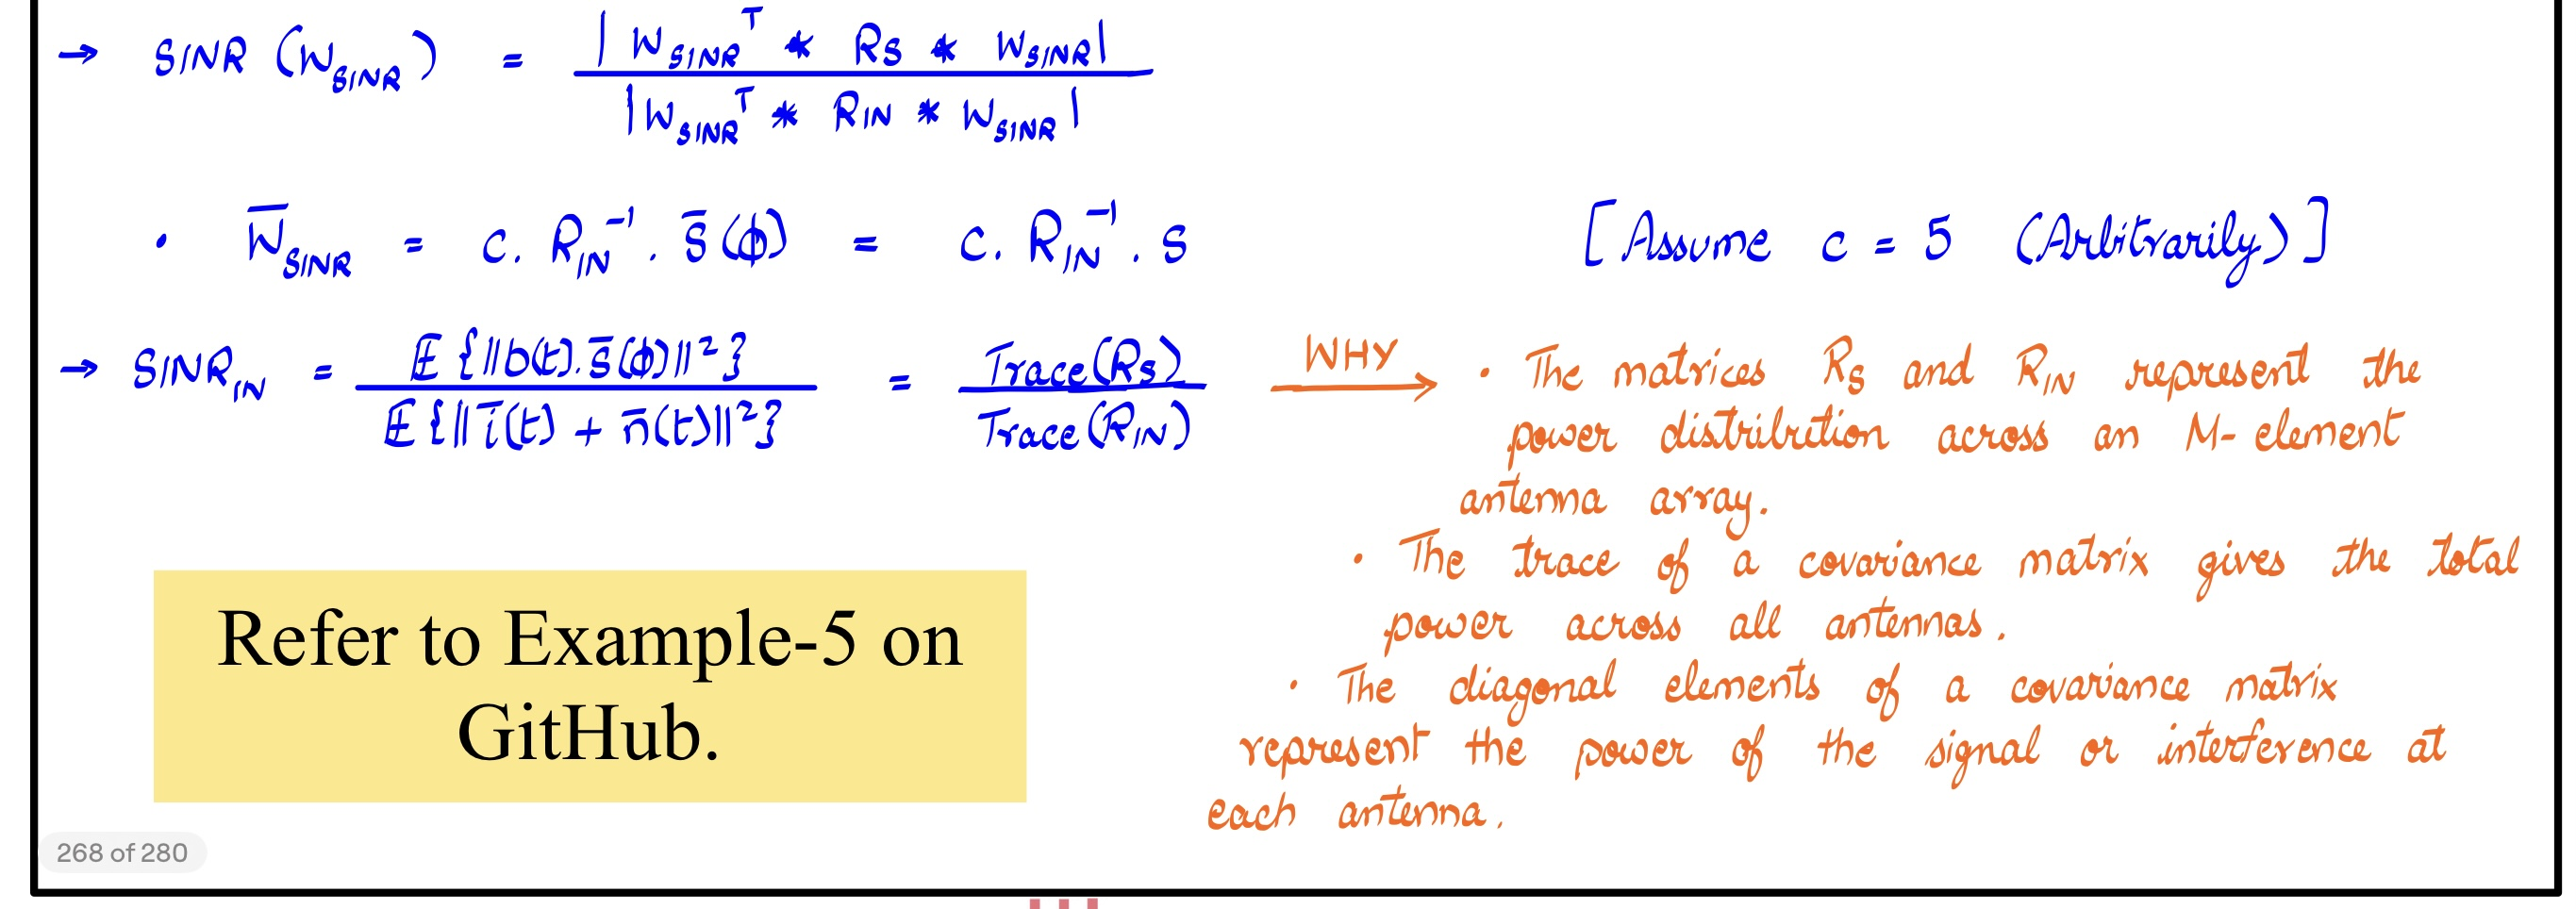

/tmp/ipykernel_95482/2232052867.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  SINRin_dB[ind] = 10 * np.log10(SINRin)


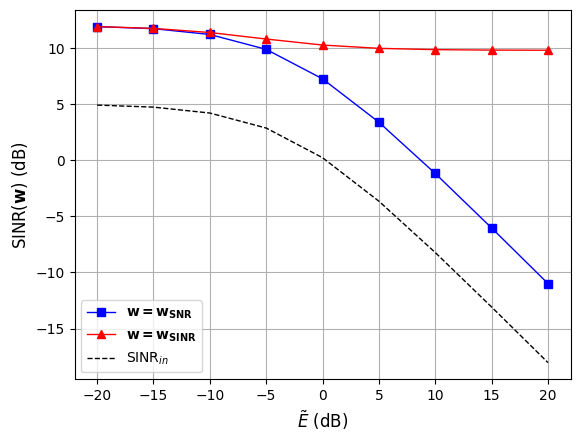

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fSINR(w, RIN, RS):
    # Placeholder for fSINR function, replace with the actual implementation
    return np.real(w.conj().T @ RS @ w) / np.real(w.conj().T @ RIN @ w)

# Problem 1
M = 5
K = 2
phis = np.array([np.pi / 4, np.pi / 6, -np.pi / 3])
A = np.exp(-1j * np.pi * np.arange(M).reshape(-1, 1) @ np.sin(phis).reshape(1, -1))
AI = A[:, 1:3]
s = A[:, 0]

# SNRin = E / sigmasq => E = sigmasq * SNRin
SNRin_dB = 5
SNRin = 10 ** (SNRin_dB / 10)
sigmasq_dB = 0
sigmasq = 10 ** (sigmasq_dB / 10)
E = SNRin * sigmasq

Etilde_axis_dB = np.arange(-20, 25, 5)
Etilde_axis = 10 ** (Etilde_axis_dB / 10)

SINRin_dB = np.zeros(len(Etilde_axis))
sinr1_dB = np.zeros(len(Etilde_axis))
sinr2_dB = np.zeros(len(Etilde_axis))

for ind, Etilde in enumerate(Etilde_axis):
    RI = Etilde * (AI @ AI.conj().T)
    RIN = RI + sigmasq * np.eye(M)
    RS = E * (s[:, None] @ s.conj()[None, :])
    SINRin = np.trace(RS) / np.trace(RIN)
    SINRin_dB[ind] = 10 * np.log10(SINRin)

    wSNR = s
    wSINR = np.linalg.solve(RIN, s)

    sinr1_dB[ind] = 10 * np.log10(fSINR(wSNR, RIN, RS))
    sinr2_dB[ind] = 10 * np.log10(fSINR(wSINR, RIN, RS))

plt.figure(3)
plt.plot(Etilde_axis_dB, sinr1_dB, 'bs-', linewidth=1, label='$\\bf w = \\bf w_{SNR}$')
plt.plot(Etilde_axis_dB, sinr2_dB, 'r^-', linewidth=1, label='$\\bf w = \\bf w_{SINR}$')
plt.plot(Etilde_axis_dB, SINRin_dB, '--k', linewidth=1, label='SINR$_{in}$')
plt.ylabel('SINR($\\bf w$) (dB)', fontsize=12)
plt.xlabel('$\\tilde{E}$ (dB)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()


# Observation:
1. When directional interference is negligible (~ -20 dB), SNR tends to SINR and the SNR-optimal beamformer is also SINR-optimal. 
2. As directional interference power increases, all the beamformer output decreases, but at different rate.
3. SINR-optimal beamformer has better "interferene resistance" capability compared to SNR-optimal beamformer.

# Now, lets fix noise variance, sigma^2 = 0 dB, and input SNR = 5 dB. 
* Let's vary the interference power and observe the optimal beamformer SINR, optimal beamformer SNR, and input SINR.

/tmp/ipykernel_95482/2947990083.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  SINRin_dB[ind] = 10 * np.log10(SINRin)


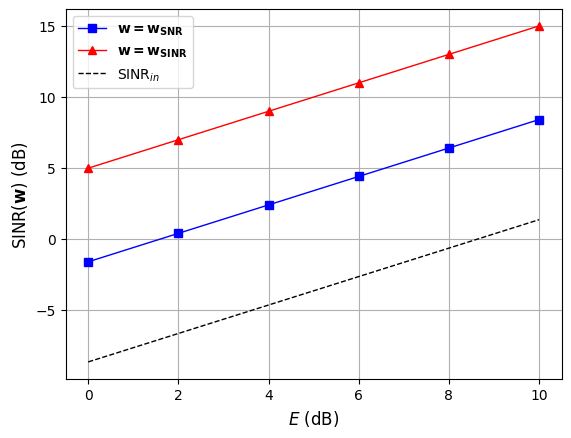

In [2]:
# SNRin = E / sigmasq => E = sigmasq * SNRin
Etilde_dB = 5
Etilde = 10 ** (Etilde_dB / 10)

E_axis_dB = np.arange(0, 12, 2)
E_axis = 10 ** (E_axis_dB / 10)

SINRin_dB = np.zeros(len(E_axis))
sinr1_dB = np.zeros(len(E_axis))
sinr2_dB = np.zeros(len(E_axis))

for ind, E in enumerate(E_axis):
    RI = Etilde * (AI @ AI.conj().T)
    RIN = RI + sigmasq * np.eye(M)
    RS = E * (s[:, None] @ s.conj()[None, :])
    SINRin = np.trace(RS) / np.trace(RIN)
    SINRin_dB[ind] = 10 * np.log10(SINRin)

    wSNR = s
    wSINR = np.linalg.solve(RIN, s)

    sinr1_dB[ind] = 10 * np.log10(fSINR(wSNR, RIN, RS))
    sinr2_dB[ind] = 10 * np.log10(fSINR(wSINR, RIN, RS))

plt.figure(4)
plt.plot(E_axis_dB, sinr1_dB, 'bs-', linewidth=1, label='$\\bf w = \\bf w_{SNR}$')
plt.plot(E_axis_dB, sinr2_dB, 'r^-', linewidth=1, label='$\\bf w = \\bf w_{SINR}$')
plt.plot(E_axis_dB, SINRin_dB, '--k', linewidth=1, label='SINR$_{in}$')
plt.ylabel('SINR($\\bf w$) (dB)', fontsize=12)
plt.xlabel('$E$ (dB)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()


# Observation:
1. For every value of E, the SINR-optimal beamformer offers constant SINR benefit compared to the SNR-optimal beamformer, which, in turn, offers constant SINR benefit compared to the input SINR.
